In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
flights_df =  pd.read_csv('data/german_airline_connection_costs.csv', usecols=[0, 1, 2])
graph = nx.from_pandas_edgelist(flights_df, source='Source', target='Target',  create_using=nx.DiGraph(), edge_attr=True)

## Podstawowe informacje

In [3]:
print(f'Wierzchołki: {graph.nodes}') 
print(f'Ilość wierzchołków: {len(graph.nodes)}')
print(f'Ilość krawędzi: {len(graph.edges)}')
print(f'Średnica gafu: {nx.diameter(graph)}')
print(f'Średnia długość grafu: {nx.average_shortest_path_length(graph)}')


Wierzchołki: ['BER', 'CGN', 'DUS', 'FRA', 'MUC', 'SCN', 'STR', 'BRE', 'HAM', 'DTM', 'GWT', 'DRS', 'FDH', 'HAJ', 'HDF', 'LEJ', 'FMO', 'NUE', 'MHG', 'LBC', 'PAD']
Ilość wierzchołków: 21
Ilość krawędzi: 92
Średnica gafu: 3
Średnia długość grafu: 1.9452380952380952


In [4]:
nx.shortest_path(graph, source='BER').keys()

dict_keys(['BER', 'CGN', 'DUS', 'FRA', 'MUC', 'SCN', 'STR', 'HAM', 'DRS', 'GWT', 'BRE', 'FDH', 'HAJ', 'HDF', 'LEJ', 'FMO', 'NUE', 'DTM', 'LBC', 'PAD', 'MHG'])

## Stopnie grafu

In [5]:
nodes_degree = [n for n, d in sorted(nx.degree(graph), key=lambda x: x[1], reverse=True)]
degrees = [d for n, d in sorted(nx.degree(graph), key=lambda x: x[1], reverse=True)]

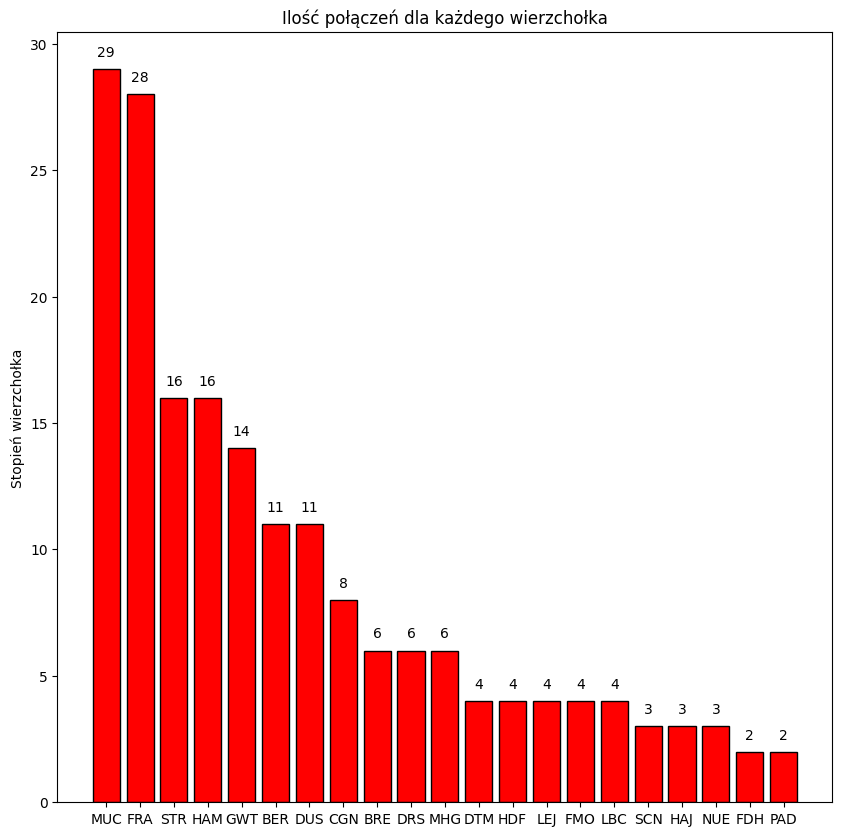

In [6]:
plt.figure(figsize=(10, 10))
plt.bar(nodes_degree, degrees, color='red',
        width = 0.8, edgecolor='black')
for i in range(len(graph.nodes)):
        plt.text(i, degrees[i] + 0.5, degrees[i], ha='center')

plt.ylabel('Stopień wierzchołka')
plt.title('Ilość połączeń dla każdego wierzchołka')
plt.show()

## Centralność wierzchołków

In [7]:
nodes_betweenness = [n for n, v in sorted(nx.betweenness_centrality(graph).items(), key=lambda x:x[1], reverse=True)]
values_betweenness = [v for n, v in sorted(nx.betweenness_centrality(graph).items(), key=lambda x:x[1], reverse=True)]

Text(0.5, 1.0, 'Miara betweenness dla każdego wierzchołka')

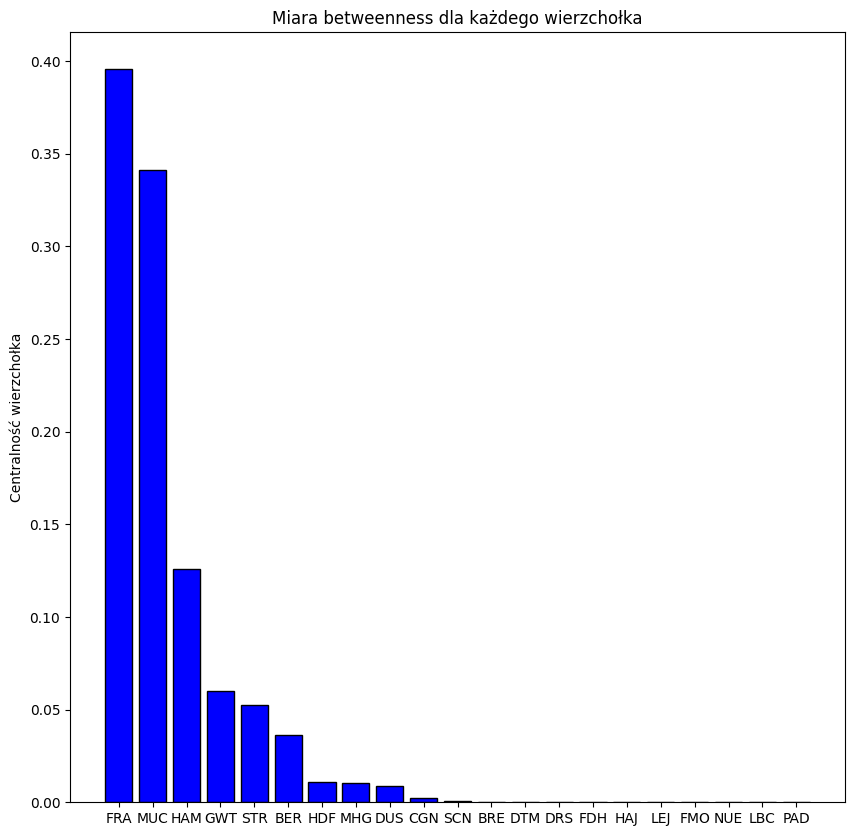

In [8]:
plt.figure(figsize=(10, 10))
plt.bar(nodes_betweenness, values_betweenness, color='blue',
        width = 0.8, edgecolor='black')
plt.ylabel('Centralność wierzchołka')
plt.title('Miara betweenness dla każdego wierzchołka')

In [9]:
nodes_closeness = [n for n, v in sorted(nx.closeness_centrality(graph).items(), key=lambda x:x[1], reverse=True)]
values_closeness = [v for n, v in sorted(nx.closeness_centrality(graph).items(), key=lambda x:x[1], reverse=True)]


Text(0.5, 1.0, 'Miara closeness dla każdego wierzchołka')

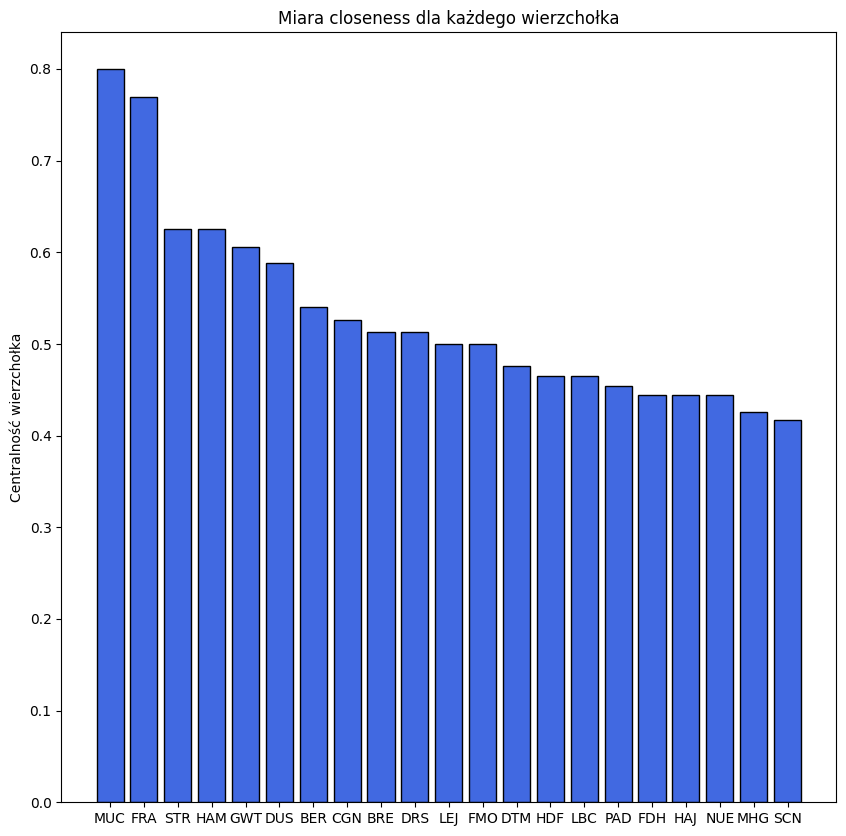

In [10]:
plt.figure(figsize=(10, 10))
plt.bar(nodes_closeness, values_closeness, color='royalblue',
        width = 0.8, edgecolor='black')

plt.ylabel('Centralność wierzchołka')
plt.title('Miara closeness dla każdego wierzchołka')

## Loty z przesiadkami

In [11]:
shortest_long_paths = []
for node_1 in graph.nodes:
    for node_2 in graph.nodes:
        shortest_path = nx.shortest_path(graph, node_1, node_2)
        if len(shortest_path) > 2:
            shortest_long_paths.append(shortest_path)
            # print(shortest_path)
            # print(nx.path_weight(graph, shortest_path, weight='Cost'))
            
print('Ilość wszystkich najkrószych ściezek, z wierzchołkami pośrednimi: ', len(shortest_long_paths))

Ilość wszystkich najkrószych ściezek, z wierzchołkami pośrednimi:  328


In [12]:
shortest_long_paths_for_connected_nodes = [
    shortest_path for shortest_path in shortest_long_paths 
    if graph.has_edge(shortest_path[0], shortest_path[-1])
]

In [13]:
len(shortest_long_paths_for_connected_nodes)

0

Wszystkie najkrótsze ścieki z wierzchołkami pośrednimi, występują jedynie pomiędzy dwoma wierzchołkami, które nie posiadają bezpośredniego lotu. Oznacza to, ze  nie opłaca się wykonywać lotu z przesiadką, jeśli istnieje bezpośrednie połączenie. W Niemczech na 420 mozliwcyh połączeń bezpośrednich między miastami, występuje ich jedynie 92. 

In [14]:
unconnected_cities = []

def has_connection(source, target):
    return nx.has_path(graph, source, target)

for node_1 in graph.nodes:
    for node_2 in graph.nodes:
        if not has_connection(node_1, node_2):
            unconnected_cities.append((node_1, node_2))

len(unconnected_cities)

0

In [15]:
nx.is_strongly_connected(graph)

True

Niemiecka struktura pozwalaja na podróz lotniczą pomiędzy wszystkimi dowolnymi miastami.